Adapted from https://matplotlib.org/stable/gallery/specialty_plots/anscombe.html

In [1]:
import matplotlib.pyplot as plt
import numpy as np
# Retina mode
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
from latexify import latexify, format_axes

In [3]:
latexify(columns=2)

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable

def plot_surface_and_contour(f, function_name, plot_gradient=False):
    # Generate data
    x = np.linspace(-5, 5, 100)
    y = np.linspace(-5, 5, 100)
    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)

    # Create the single figure with two subplots
    fig = plt.figure()

    # Plot the 3D surface on the first subplot
    ax1 = fig.add_subplot(121, projection='3d')
    ax1.plot_surface(X, Y, Z, cmap='magma', edgecolor='none')  # Remove grid lines
    ax1.set_xlabel('x')
    ax1.set_ylabel('y')
    ax1.set_zlabel('z')
    ax1.grid(False)
    ax1.xaxis.pane.fill = False
    ax1.yaxis.pane.fill = False
    ax1.zaxis.pane.fill = False
    ax1.view_init(elev=30, azim=30)
    ax1.set_title('Surface Plot')

    # Plot the contour plot on the second subplot
    ax2 = fig.add_subplot(122, aspect='equal')  # Set 1:1 aspect ratio
    contour = ax2.contourf(X, Y, Z, levels=10, cmap='magma')
    ax2.set_xlabel('x')
    ax2.set_ylabel('y')
    ax2.set_title('Contour Plot')

    # Add a colorbar in between the subplots
    divider = make_axes_locatable(ax2)
    cax = divider.append_axes("right", size="5%", pad=0.1)
    cbar = plt.colorbar(contour, cax=cax)
    
    if plot_gradient:
        # Quiver plot for gradient
        gradient_x, gradient_y = np.gradient(Z, x, y)
        ax2.quiver(X, Y, -gradient_x, -gradient_y, color='white', scale=40, pivot='middle', width=0.005)
    
    # Save the figure
    plt.tight_layout(pad=1.0, w_pad=1.0)
    fig.savefig(f"../figures/mml/contour-{function_name}.pdf", bbox_inches="tight")


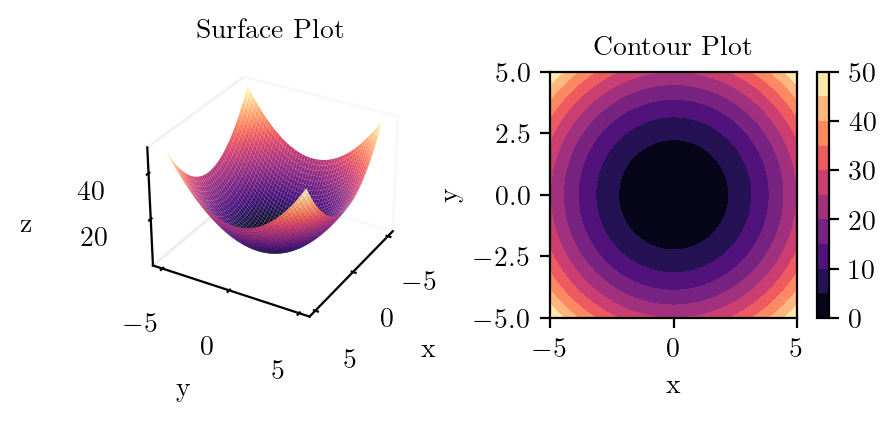

In [5]:
plot_surface_and_contour(lambda x, y: x**2 + y**2, "x_squared_plus_y_squared")


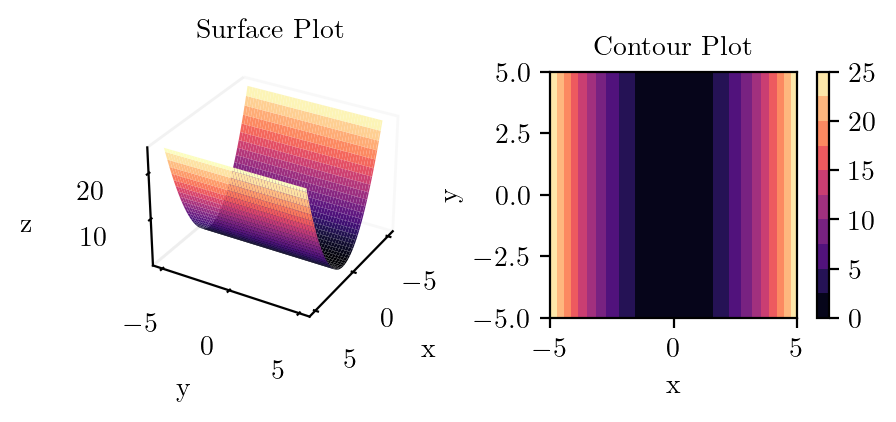

In [6]:
plot_surface_and_contour(lambda x, y: x**2, "x_squared")


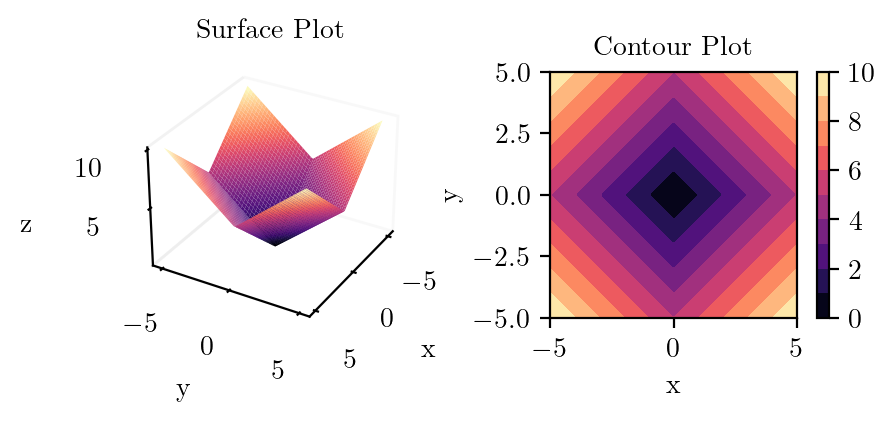

In [7]:
plot_surface_and_contour(lambda x, y: np.abs(x) + np.abs(y), "mod_x_plus_mod_y")


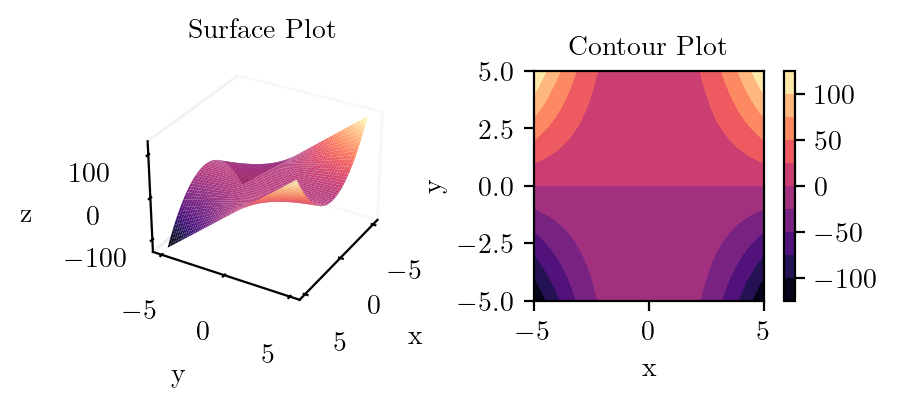

In [8]:
plot_surface_and_contour(lambda x, y: (x**2) * y, "x_square_times_y")


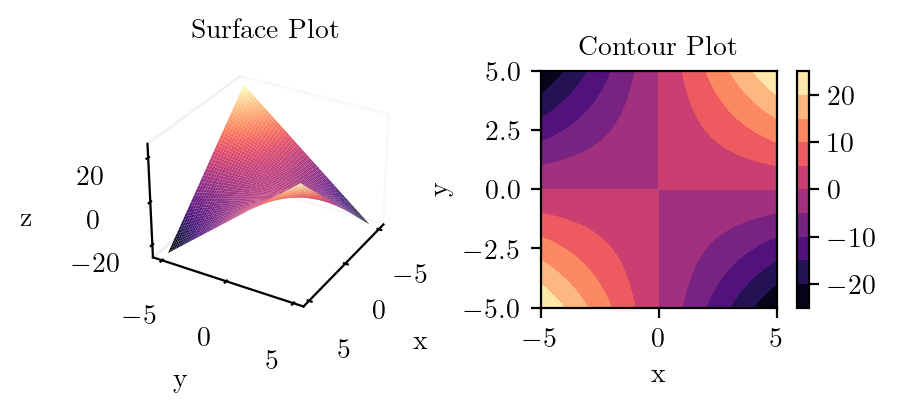

In [9]:
plot_surface_and_contour(lambda x, y: x * y, "x_times_y")


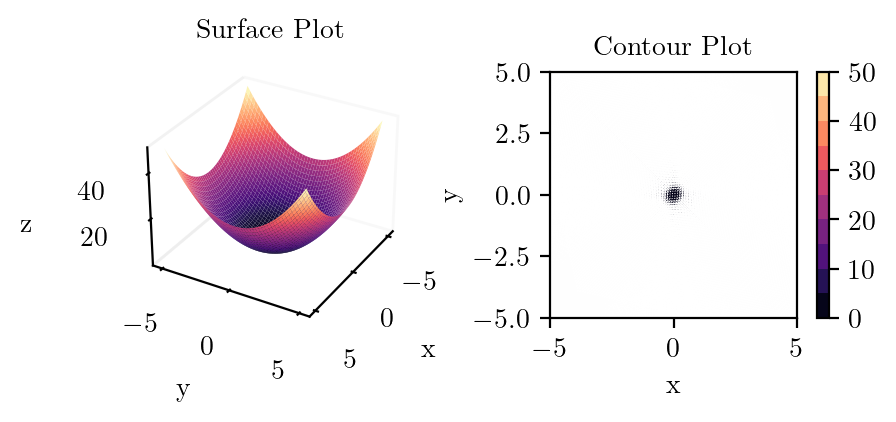

In [12]:
plot_surface_and_contour(lambda x, y: x**2 + y**2, "x_squared_plus_y_squared", plot_gradient=True)


In [15]:
f = lambda x, y: x**2 + y**2

In [17]:
X = np.linspace(-5, 5, 100)
Y = np.linspace(-5, 5, 100)

X, Y = np.meshgrid(X, Y)
Z = f(X, Y)

In [20]:
np.gradient(Z, X, Y)

ValueError: distances must be either scalars or 1d

In [99]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
import torch

def plot_surface_and_contour(f, function_name, uv = None, stride=20):
    # Generate data
    x = np.linspace(-5, 5, 100)
    y = np.linspace(-5, 5, 100)
    X, Y = np.meshgrid(x, y)
    
    # Convert to PyTorch tensors
    X_torch = torch.from_numpy(X)
    Y_torch = torch.from_numpy(Y)
    X_torch.requires_grad_(True)
    Y_torch.requires_grad_(True)

    # Evaluate the function
    Z = f(X_torch, Y_torch)

    # Create the single figure with two subplots
    fig = plt.figure()

    # Plot the 3D surface on the first subplot
    ax1 = fig.add_subplot(121, projection='3d')
    ax1.plot_surface(X, Y, Z.detach().numpy(), cmap='magma', edgecolor='none')  # Remove grid lines
    ax1.set_xlabel('x')
    ax1.set_ylabel('y')
    ax1.set_zlabel('z')
    ax1.grid(False)
    ax1.xaxis.pane.fill = False
    ax1.yaxis.pane.fill = False
    ax1.zaxis.pane.fill = False
    ax1.view_init(elev=30, azim=30)
    ax1.set_title('Surface Plot')

    # Plot the contour plot on the second subplot
    ax2 = fig.add_subplot(122, aspect='equal')  # Set 1:1 aspect ratio
    #contour = ax2.contour(X, Y, Z.detach().numpy(), levels=10, cmap='magma', alpha=0.1)
    ax2.set_xlabel('x')
    ax2.set_ylabel('y')
    ax2.set_title('Contour Plot')

    # Add a colorbar in between the subplots
    divider = make_axes_locatable(ax2)
    cax = divider.append_axes("right", size="5%", pad=0.1)
    #cbar = plt.colorbar(contour, cax=cax)
    
    if uv is not None:
        u = uv[0](X_torch, Y_torch)
        v = uv[1](X_torch, Y_torch)
        # Quiver plot for gradient
        ax2.quiver(X[::stride], Y[::stride], -u.detach().numpy()[::stride], -v.detach().numpy()[::stride])
        

    # Save the figure
    plt.tight_layout(pad=1.0, w_pad=1.0)
    fig.savefig(f"../figures/mml/contour-{function_name}.pdf", bbox_inches="tight")

# Example usage:
# Define your function f(x, y) and its gradient g(x, y)
#f = lambda x, y: x**2 + y**2
#g = lambda x, y: (2*x, 2*y)
#plot_surface_and_contour(f, "x_squared_plus_y_squared", uv=(lambda x, y: 2*x, lambda x, y: 2*y))


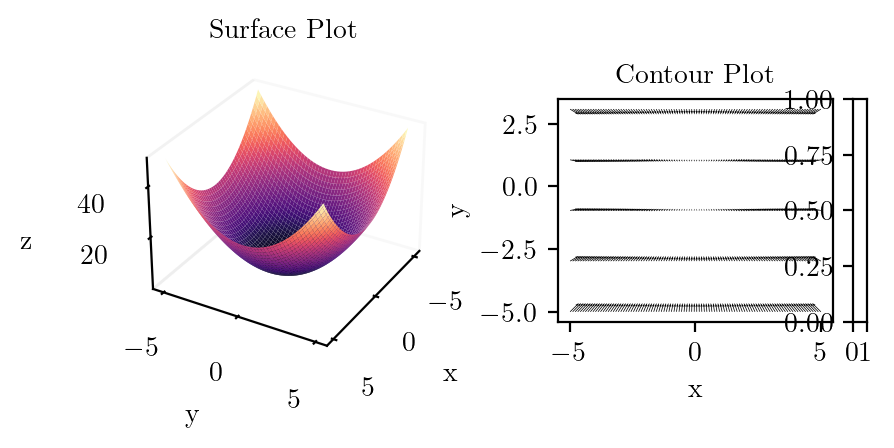

In [100]:
plot_surface_and_contour(lambda x, y: x**2 + y**2, "x_squared_plus_y_squared", uv=(lambda x, y: 2*x, lambda x, y: 2*y))

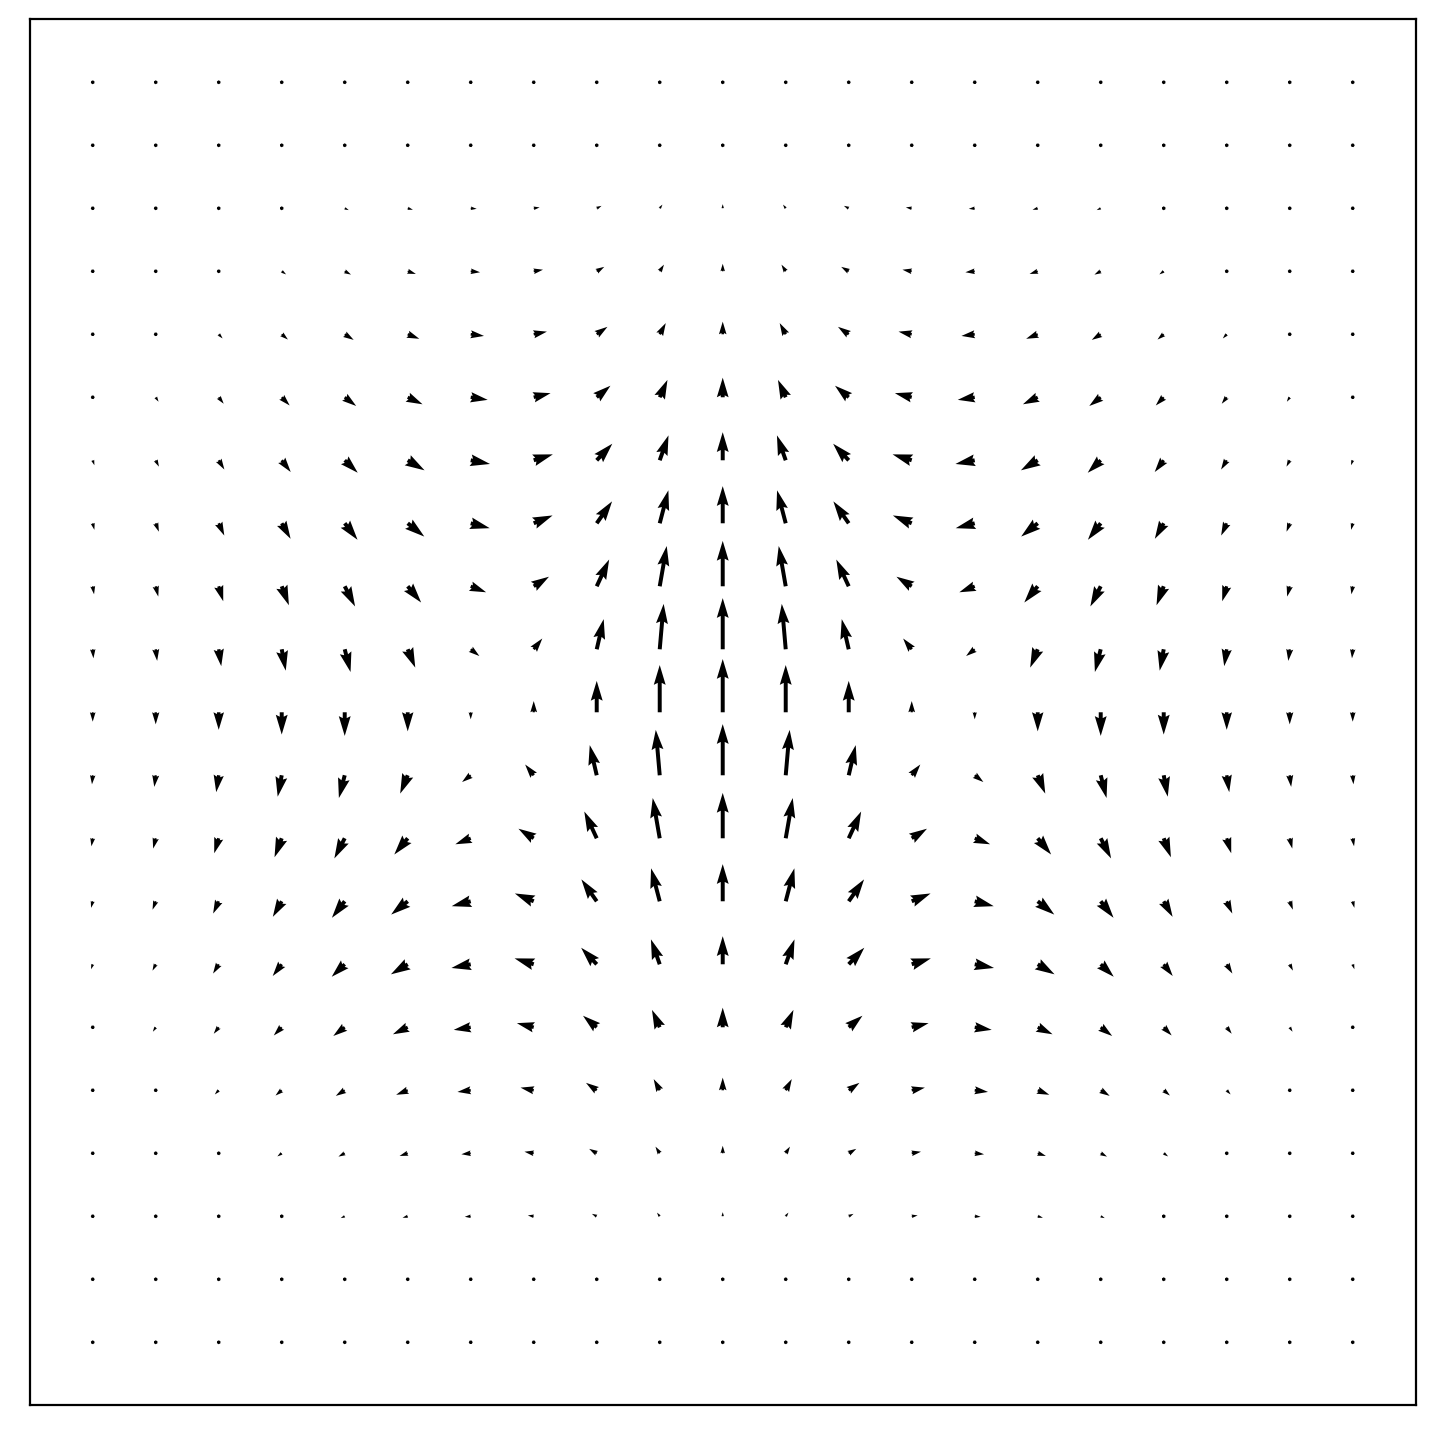

In [82]:
# Creating arrows
x = np.arange(-2, 2.2, 0.2)
y = np.arange(-2, 2.2, 0.2)
 
# Creating gradient
X, Y = np.meshgrid(x, y)
z = X * np.exp(-X**2-Y**2)
dx, dy = np.gradient(z)
 
# Creating plot 
fig, ax = plt.subplots(figsize =(9, 9))
ax.quiver(X, Y, dx, dy, scale=5)
 
ax.xaxis.set_ticks([])
ax.yaxis.set_ticks([])
ax.set_aspect('equal')